## 1 ) Write code for two functions:
# • The first function takes as input parameters w, b of a linear classifier as well as a data point
# x, and returns the label for that point: sign(w · x + b). The label is either +1 or −1.
# • The second function takes as input an array of data points and an array of labels (where each
# label is +1 or −1), and runs the Perceptron algorithm to learn a linear classifier w, b. The
# algorithm should begin by randomly permuting the data points.

In [84]:
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys


import gzip
import os
import copy
import random

gra
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# the first function takes as input parameters w, b of a linear classifier as well as a data point
# x, and returns the label for that point: sign(w · x + b). The label is either +1 or −1.


# • The second function takes as input an array of data points and an array of labels (where each
# label is +1 or −1), and runs the Perceptron algorithm to learn a linear classifier w, b. The
# algorithm should begin by randomly permuting the data points.# • The second function takes as input an array of data points and an array of labels (where each
# label is +1 or −1), and runs the Perceptron algorithm to learn a linear classifier w, b. The
# algorithm should begin by randomly permuting the data points.

In [85]:
def sign(x,w,b):
    if np.dot(w,x)+b >0:
        return 1 
    else:
        return -1

In [86]:

# totally T epoches to iterate
def perceptron(x,y,n_epoch):
#2X0
    w = np.zeros((x.shape[1],))
    b = 0
    count=0
    y_reshape=y.reshape((100,1))
    data=np.hstack((x,y_reshape))
    np.random.shuffle(data)
    train = data[:,0:2]
    test = data[:,-1]
    for t in range (n_epoch):                    
    # totally m data points    
        for i in range(train.shape[0]):
            # misclassify data points                 
            if sign(train[i],w,b)!= test[i]:    
                w  = w + test[i] * train[i]
                b = b + test[i]
                count +=1
                
    return w,b, count

In [121]:
w = np.zeros((x1.shape[1],))
w.shape

(2,)

In [126]:
b=0
x_test=x1[99]
sign(x_test,w,b)

-1

## (b) Load in the Iris data set. You can do this by simply invoking:
## The data has four features and three labels. Restrict it to features 1 and 3 (the second and fourth
## columns, sepal width and petal width) and to labels 0,1. Recode label 0 as −1, since this is what
## the Perceptron algorithm is expecting.

In [87]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target


In [118]:
x.shape
x1= x[:,[1,3]]
x1.shape
x1=x1[y!=2]
x1.shape

(100, 2)

In [12]:
y.shape
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [117]:
y1 = y[y!=2]
y1.shape

y1=np.asarray([-1 if i==0 else 1 for i in y1])
print(y1,y1.shape)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1] (100,)



## c) Now run the Perceptron algorithm on the data. In your writeup, 
## show a plot with the data points (where the two labels have different colors) and the resulting decision boundary.

In [91]:
w, b, count=perceptron(x1,y1,10)
print(w)
print(b)
count

[-0.4  1.3]
0.0


2

In [92]:
w1=w[0]
w2=w[1]
print(w1)
print(w2)

-0.3999999999999999
1.3


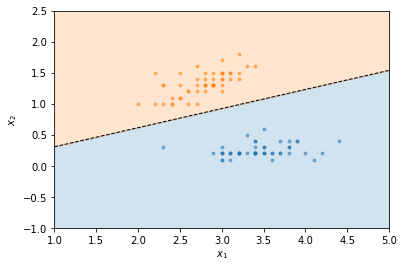

In [93]:
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 1, 5
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*x1[y1==-1].T, s=8, alpha=0.5)
plt.scatter(*x1[y1==1].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

##  Now modify your code from part (a) to count the number of updates made by the Perceptron algorithm 
## while it is learning. Run the algorithm 20 times and keep track of the number of updates needed each time. In your writeup, include a histogram of these values.


In [94]:
def track_count(x,y,n_epoch):
#2X0
    w = np.zeros((x.shape[1],))
    b = 0
    count=0
    y_reshape=y.reshape((100,1))
    data=np.hstack((x,y_reshape))
    np.random.shuffle(data)
    train = data[:,0:2]
    test = data[:,-1]
    for t in range (n_epoch):                    
    # totally m data points    
        for i in range(train.shape[0]):
            # misclassify data points                 
            if sign(train[i],w,b)!= test[i]:    
                w  = w + test[i] * train[i]
                b = b + test[i]
                count +=1
                
    return count

In [95]:
count=track_count(x1,y1,10)
count

13

In [96]:
def repeat():
    listcount =[]
    for i in range(20):
        counter = track_count(x1,y1,10)
        listcount.append(counter)
    return listcount

In [97]:
listcount = repeat()
listcount

[10, 17, 2, 23, 15, 14, 17, 21, 9, 9, 17, 16, 13, 4, 2, 13, 11, 13, 9, 9]

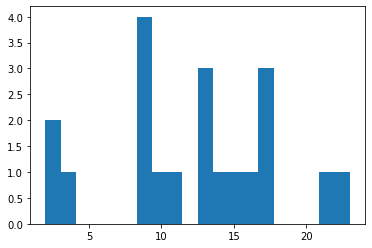

In [98]:
#histogram
##?
#np.histogram(listcount, bins=[0, 1, 2, 3])
n_bins =20
plt.hist(listcount, bins=n_bins) 
plt.show()

## #2 Support vector machine. As you did with the Perceptron, use the Iris data set, but this time use features 0 and 2, and labels 1,2.
## (a) Is this data linearly separable?

# --no, not converge, so should not be linearly separable.

In [99]:
x2=x[:,[0,2]]
x2=x2[y!=0]
x2.shape


(100, 2)

In [100]:
y2 = y[y!=0]
y2=np.asarray(y2)
y2.reshape((100,1))

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

## b) Use sklearn.svm.SVC to fit a support vector machine classifier to the data. You will need to invoke the option kernel=’linear’. 
## Try at least 10 different values of the slack parameter C. 
## In your writeup, include a table that shows these values of C and for each of them gives the training error and the number of support vectors.

In [101]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report



In [102]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [103]:
for C in [0.001, 0.01, 0.1, 1,10,20, 30,100,1000,10000]:
    clf = svm.SVC(kernel='linear', C=C)
    score=clf.fit(X_train,y_train).score(X_train, y_train)
    error=(1-score)*100.00
    print (C, error, len(clf.support_vectors_))

0.001 47.5 76
0.01 9.999999999999998 76
0.1 6.25 48
1 2.500000000000002 24
10 3.749999999999998 11
20 2.500000000000002 9
30 2.500000000000002 9
100 3.749999999999998 7
1000 2.500000000000002 6
10000 2.500000000000002 5


## (c) Which value of C do you think is best? For this value, include a plot of the data points and the linear decision boundary.
## I think C=1 is the best, because C=1 give the lowest error


In [107]:
clf_2 = svm.SVC(kernel='linear', C=1)
score_2=clf_2.fit(X_train,y_train).score(X_train, y_train)
error_2=(1-score_2)*100.00
error_2

2.500000000000002

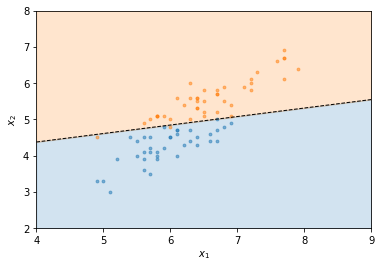

In [108]:
weights = clf_2.coef_[0]
bias =clf_2.intercept_[0]
w1 = weights[0]
w2 = weights[1]
b=bias
##plot
 # Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 4, 9
ymin, ymax = 2, 8
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X_train[y_train==1].T, s=8, alpha=0.5)
plt.scatter(*X_train[y_train==2].T, s=8, alpha=0.5)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')

plt.show()

## 3. Multiclass Perceptron. Implement the multiclass Perceptron algorithm from class.
## (a)  Load in the data set data0.txt. This has 2-d data in four classes (coded as 0,1,2,3). Each row consists of three numbers: the two coordinates of the data points and the label.

In [30]:
data =np.loadtxt('data0.txt')

In [109]:
data.shape

(48, 3)

## Run the multiclass Perceptron algorithm to learn a classifier. 
## Create a plot that shows all the data points (with different colors and shapes for different labels) as well as the decision regions.

In [32]:
data.shape[0]

48

In [33]:
x3 = data[:,:2]
print(x3.shape[0],x3.shape[1])

48 2


In [34]:
y3 = (data[:, -1]).astype(int)
print(y3.shape)
y3

(48,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [ ]:
#w is number of class * number of feature
w=np.zeros((len(np.unique(y3)),x3.shape[1]))
# b is number of class
b=np.zeros(len(np.unique(y3),))
print(w.shape,w, b.shape,b)

In [37]:
# totally T epoches to iterate
def multi_perceptron(x,y,n_epoch):

    w = np.zeros((len(np.unique(y)),x.shape[1]))
    #number of class X number of features 4X2
    b = np.zeros(len(np.unique(y),))
    #number of class 4
    count=0
    for t in range (n_epoch):
        shuffled_indices = np.random.permutation(len(x))
        x_shuffled = x[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        #print(x_shuffled.shape, y_shuffled.shape)
    # totally m data points    
        for i in range(x_shuffled.shape[0]):
            y_hat = np.argmax(np.dot(w,x_shuffled[i]) + b)
            # misclassify data points                 
            if y_hat != y_shuffled[i]:    
                w[y_shuffled[i]]  = w[y_shuffled[i]] + x_shuffled[i]
                b[y_shuffled[i]] = b[y_shuffled[i]] + 1
                w[y_hat] = w[y_hat] - x_shuffled[i]
                b[y_hat] = b[y_hat] - 1
                count +=1
    return w,b
#y_pred,predict,error,count
    #return error

In [48]:
def multiPerceptron_predict(x,y,w,b):
    predict = np.argmax((np.dot(x,w.T) + b), axis = 1)
    error = 1 - np.mean(predict == y)
    return predict, error

In [39]:
w,b = multi_perceptron(x3,y3,100)
w,b

(array([[  9.,  -6.],
        [-52.,  38.],
        [ 33., -38.],
        [ 10.,   6.]]),
 array([ 62., -13., -13., -36.]))

In [49]:
predict, error=multiPerceptron_predict(x3,y3,w,b)
predict, error

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3]),
 0.0)

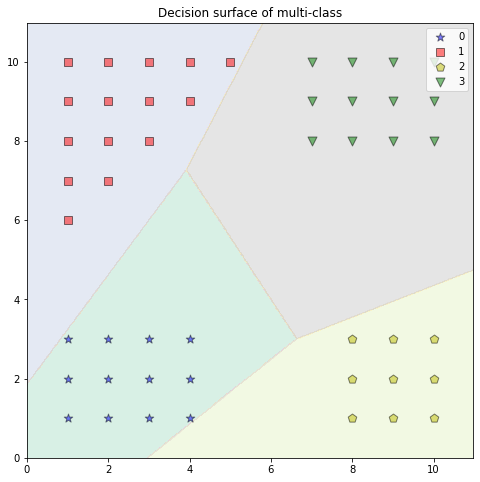

In [141]:
# avoid this ugly slicing by using a two-dim dataset
X = x3
y = y3
colors = "bryg"
markers = ["*","s","p","v"]
figure(figsize = (8,8))


h = 0.02  # step size in the mesh

w,b = multi_perceptron(X,y,100)
predict, error=multiPerceptron_predict(X,y,w,b)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
Z, error=multiPerceptron_predict(np.c_[xx.ravel(), yy.ravel()],y,w,b)


# Put the result into a color plot
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2,alpha=0.5)
#plt.axis('tight')

# Plot also the training points
for i, color, marker in zip(np.unique(y), colors, markers):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.Pastel2, edgecolor='black', s=80, marker=marker,alpha=0.5)
plt.title("Decision surface of multi-class")
plt.axis('tight')

# Plot the three one-against-all classifiers
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = w
intercept = b


plt.legend(loc='upper right')
plt.show()

In [143]:
Z.shape

(550, 550)

## 4. Multiclass SVM. In this problem, we’ll use support vector machines to classify the MNIST data set of handwritten digits.
## (a) Load in the MNIST data: a training set of 60,000 points and a separate test set of 10,000 points.
## (b) Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to see loss=’hinge’.
## How can you choose a suitable value of C? Explain your methodology.
## (c) Report the final test error. Is this data linearly separable?

## (a) Load in the MNIST data: a training set of 60,000 points and a separate test set of 10,000 points.


In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import gzip
import sys
import os
import copy
import numpy as np
import pandas as pd
import pickle
import string
import operator
import bz2
import random
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree
from sklearn import metrics
from sklearn.preprocessing import scale
from pylab import rcParams
from struct import unpack
from scipy.stats import multivariate_normal

if sys.version_info[0] == 2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.cluster as cluster
import matplotlib.pyplot as plt

from struct import unpack
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

np.random.seed(12345)

In [73]:
from struct import unpack
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

In [74]:
if sys.version_info[0]==2:
    from urllib import urlretrieve
else:
    from urllib.request import urlretrieve

def download(filename, source = 'http://yann.lecun.com/exdb/mnist/'):
    print('Downloading %s' % filename)
    urlretrieve(source + filename, filename)

def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(),np.uint8,offset=16)
    data = data.reshape(-1,784)
    return data / np.float32(256)

def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(),np.uint8,offset=8)
    return data

%matplotlib inline
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import BallTree

## Load the training set
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')

## Load the test set
test_data = load_mnist_images('t10k-images-idx3-ubyte.gz')
test_labels = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

#x,y = loadmnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')

In [75]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## (b) Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to see loss=’hinge’.
## How can you choose a suitable value of C? Explain your methodology.
# --if data is more spreated out, use large C, if more over lapping, use small c
# --In general, having few training instances and many attributes make it easier to make a linear separation of the data. 
# --Also that fact that you are evaluating on your training data and not new unseen data makes separation easier.

In [144]:
# defining parameter range
c_list = {'C': [0.01, 0.1, 1, 10, 100, 1000]}   

lsvc = LinearSVC(loss='hinge',
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001)
grid = GridSearchCV(lsvc, c_list)
score4=grid.fit(train_data,train_labels)
    

In [145]:
print (grid.best_estimator_)
grid.score(train_data,train_labels)


LinearSVC(C=1, loss='hinge')


0.9296333333333333

## (c) Report the final test error. Is this data linearly separable?

In [146]:
lsvc = LinearSVC(C=1, loss='hinge',
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001)
lsvc.fit(train_data,train_labels)
error_score = 1-grid.score(test_data, test_labels)
error_score

0.07820000000000005